This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [1]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('Combination-high-low-basecase.csv', skiprows=6, low_memory=False)
Basecasenormal = pd.read_csv('Combination-high-low-basecase.csv', skiprows=6, low_memory=False)

In [3]:
# Rename two column names
Basecase.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)
Basecase.rename(columns={'Increase-only-for-high-values?':'Increase if value > 0.5?'},inplace=True)
Basecasenormal.rename(columns={'Increase-only-for-high-values?':'Increase if value > 0.5?'},inplace=True)

In [4]:
#Basecase["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)
#Basecasenormal["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)

In [5]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)

Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-25
Basecase[0:100]

,run_number,Value-of-price-modification,Social-influence-radius,Random-seed?,Segment-influence,Rebound?,Seed,Social-influence-threshold,Price-influence,Increase if value > 0.5?,...,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,year1,year
39528,3,0,13,True,5,True,10,5,5,True,...,3.216072,30.905695,21.020634,1.050808,5.080831,180.4,8.8,164.4,15.000000,-10.000000
39536,3,0,13,True,5,True,10,5,5,True,...,3.209120,30.926767,20.976550,1.050750,5.074971,180.6,8.8,164.6,15.002740,-9.997260
39544,3,0,13,True,5,True,10,5,5,True,...,3.210896,30.921106,20.979525,1.050808,5.080831,180.4,8.8,164.4,15.005479,-9.994521
39551,3,0,13,True,5,True,10,5,5,True,...,3.209932,30.928807,20.972283,1.050750,5.074971,180.6,8.8,164.6,15.008219,-9.991781
39559,3,0,13,True,5,True,10,5,5,True,...,3.207766,30.923147,20.985051,1.050867,5.086705,180.2,8.8,164.2,15.010959,-9.989041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40241,3,0,13,True,5,True,10,5,5,True,...,3.223812,30.895230,20.935460,1.052995,5.299539,181.0,9.2,164.4,15.260274,-9.739726
40248,3,0,13,True,5,True,10,5,5,True,...,3.223685,30.889669,20.949573,1.053057,5.305652,180.8,9.2,164.2,15.263014,-9.736986
40256,3,0,13,True,5,True,10,5,5,True,...,3.211777,30.897247,20.911306,1.053179,5.317919,180.6,9.2,163.8,15.265753,-9.734247
40264,3,0,13,True,5,True,10,5,5,True,...,3.209088,30.904822,20.910959,1.053179,5.317919,180.6,9.2,163.8,15.268493,-9.731507


In [6]:
Basecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052000 entries, 39528 to 2927999
Data columns (total 43 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   run_number                         int64  
 1   Value-of-price-modification        int64  
 2   Social-influence-radius            int64  
 3   Random-seed?                       bool   
 4   Segment-influence                  int64  
 5   Rebound?                           bool   
 6   Seed                               int64  
 7   Social-influence-threshold         int64  
 8   Price-influence                    int64  
 9   Increase if value > 0.5?           bool   
 10  Yearly-textile-consumption-avg     int64  
 11  Possession-span-stdev              int64  
 12  Social-influence                   float64
 13  Disposal-feedback?                 bool   
 14  Number-consumers                   int64  
 15  Lifetime-decrease-reuse            int64  
 16  Value-change  

In [7]:
Basecase['Reused textiles consumed [%]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 39528      Current
39536      Current
39544      Current
39551      Current
39559      Current
            ...   
2927995    Current
2927996    Current
2927997    Current
2927998    Current
2927999    Current
Name: Reused textiles consumed [%], Length: 2052000, dtype: object>

In [8]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

In [9]:
Basecase_melted = Basecase.melt(id_vars = ["reused-textiles-percentage", 'year'], value_vars = ['Value-of-price-modification', 'Value-of-environment-modification' ,'Value-of-convenience-modification'], var_name='Value-modification', value_name = 'reused_melted')
#Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [10]:
Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [11]:
display(Basecase_melted.head())

,reused-textiles-percentage,year,Value-modification,reused_melted
0,5.080831,-10.000000,Value-of-price-modification,0
1,5.074971,-9.997260,Value-of-price-modification,0
2,5.080831,-9.994521,Value-of-price-modification,0
3,5.074971,-9.991781,Value-of-price-modification,0
4,5.086705,-9.989041,Value-of-price-modification,0


In [12]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

# Figures not shortend

[None, None]

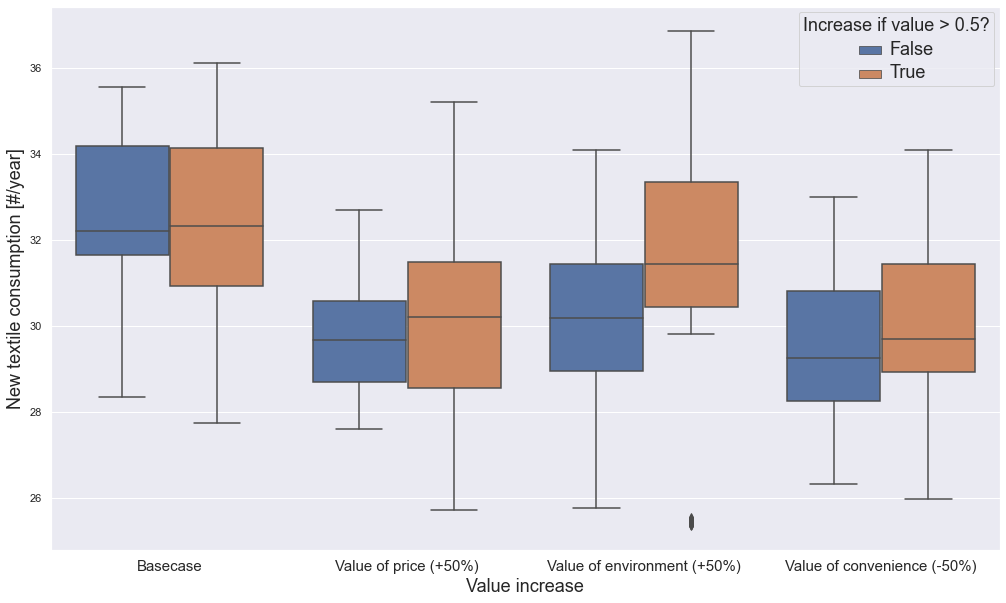

In [222]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='new-consumption', x = 'Value-change', order = ["Basecase","Value-of-price-increase", "Value-of-environment-increase", "Value-of-convenience-increase"], hue = 'Increase if value > 0.5?')
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of price (+50%)", "Value of environment (+50%)", "Value of convenience (-50%)"], fontsize=15)

plt.setp(bn.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bn.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

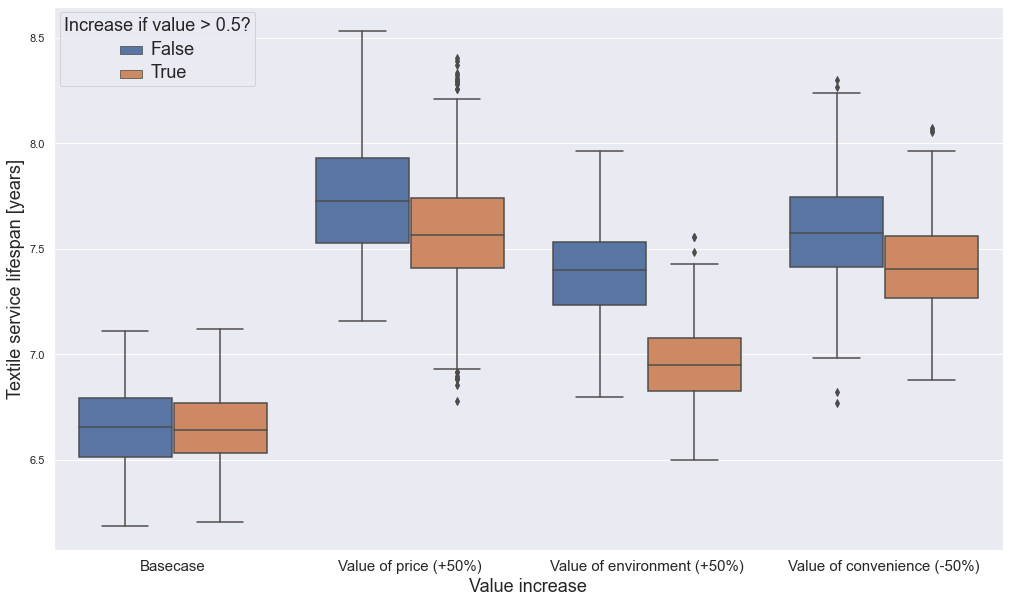

In [223]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bs = sns.boxplot(data=Basecase_short, y ='service-lifespan-1', x = 'Value-change', order = ["Basecase", "Value-of-price-increase", "Value-of-environment-increase", "Value-of-convenience-increase"], hue = 'Increase if value > 0.5?')
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Textile service lifespan [years]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of price (+50%)", "Value of environment (+50%)", "Value of convenience (-50%)"], fontsize=15)

plt.setp(bs.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bs.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

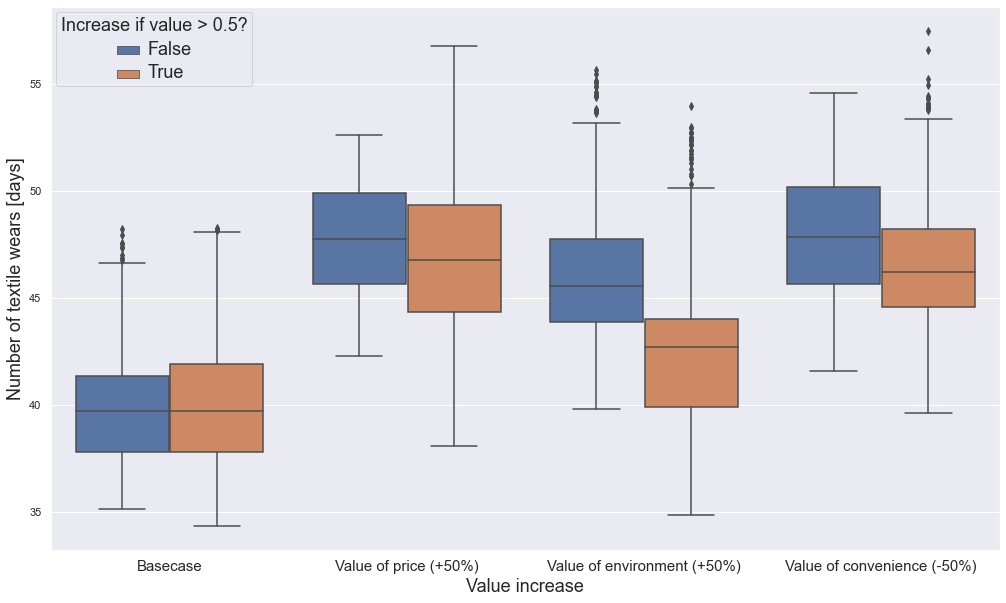

In [224]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bw = sns.boxplot(data=Basecase_short, y ='wears-1', x = 'Value-change', order = ["Basecase", "Value-of-price-increase", "Value-of-environment-increase", "Value-of-convenience-increase"], hue = 'Increase if value > 0.5?')
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Number of textile wears [days]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of price (+50%)", "Value of environment (+50%)", "Value of convenience (-50%)"], fontsize=15)

plt.setp(bw.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bw.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

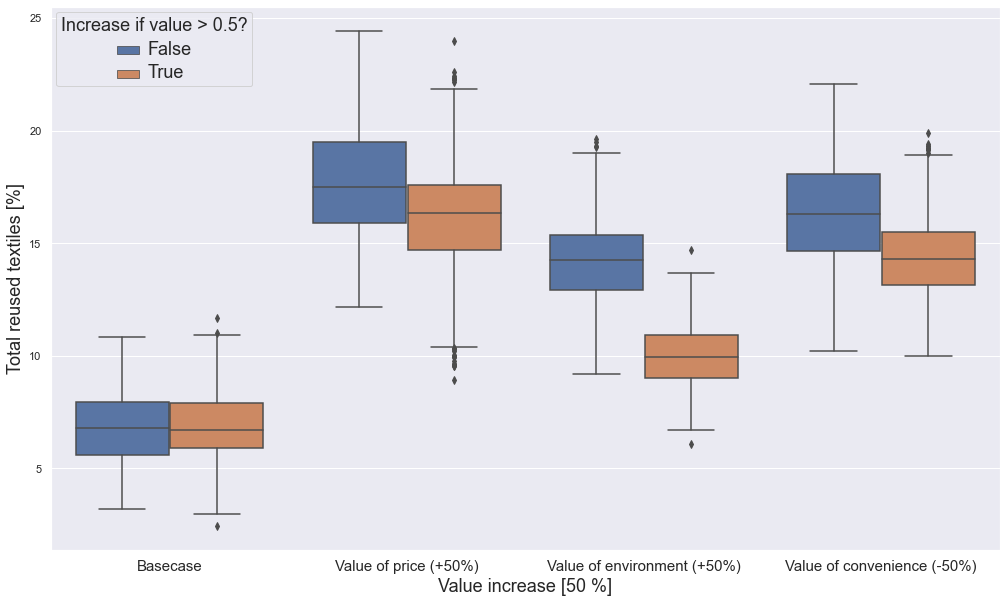

In [13]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
br = sns.boxplot(data=Basecase_short, y ='reused-textiles-percentage', x = 'Value-change', order = ["Basecase", "Value-of-price-increase", "Value-of-environment-increase", "Value-of-convenience-increase"], hue = 'Increase if value > 0.5?')
plt.xlabel('Value increase [50 %]', fontsize = 18)
plt.ylabel('Total reused textiles [%]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of price (+50%)", "Value of environment (+50%)", "Value of convenience (-50%)"], fontsize=15)

plt.setp(br.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(br.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

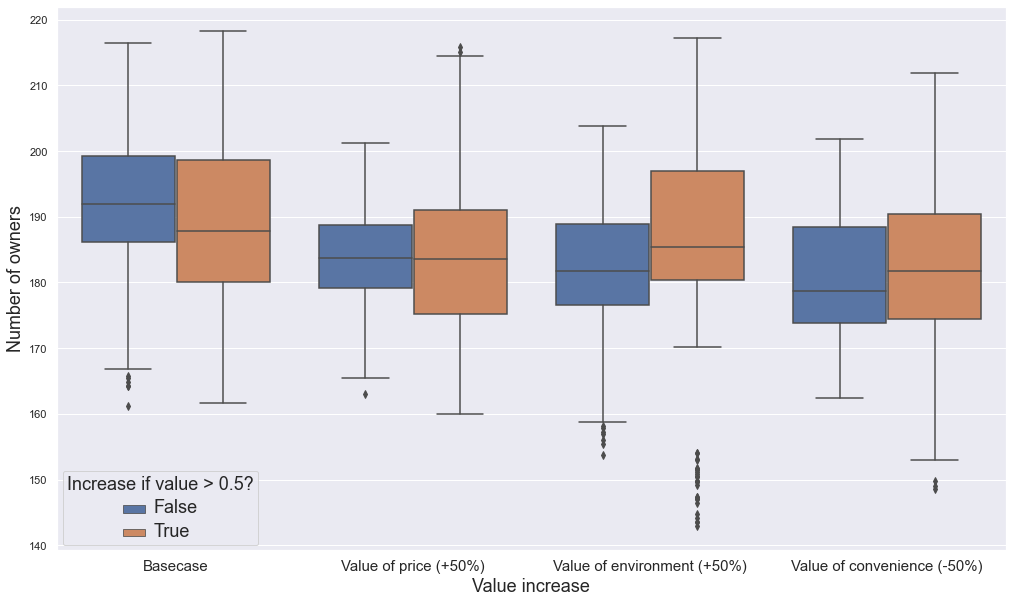

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bo = sns.boxplot(data=Basecase_short, y ='textiles-in-closet', x = 'Value-change', order = ["Basecase", "Value-of-price-increase", "Value-of-environment-increase", "Value-of-convenience-increase"], hue = 'Increase if value > 0.5?')
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Number of owners', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of price (+50%)", "Value of environment (+50%)", "Value of convenience (-50%)"], fontsize=15)

plt.setp(bo.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bo.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

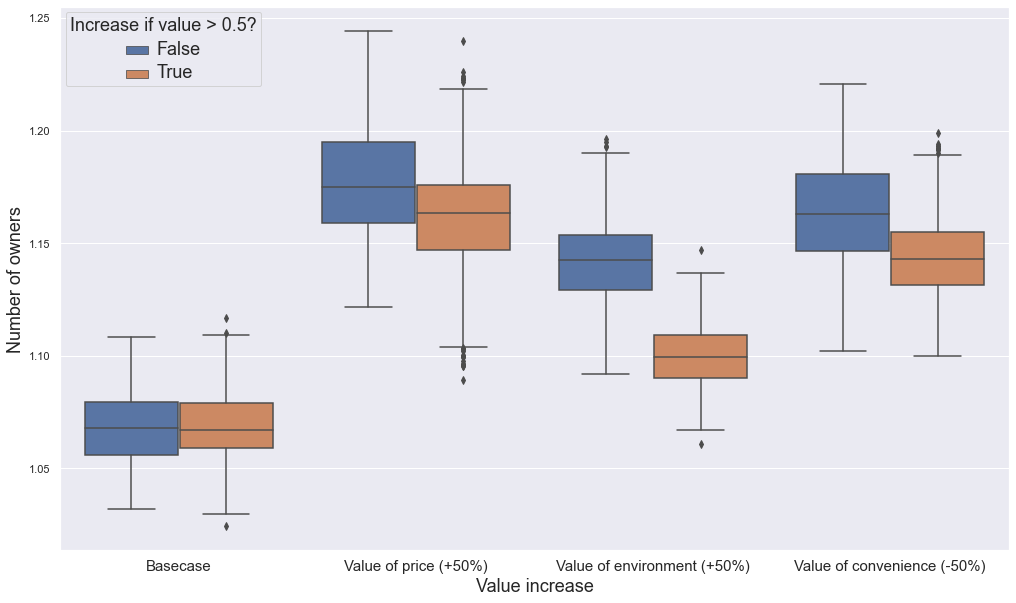

In [229]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bo = sns.boxplot(data=Basecase_short, y ='owners', x = 'Value-change', order = ["Basecase", "Value-of-price-increase", "Value-of-environment-increase", "Value-of-convenience-increase"], hue = 'Increase if value > 0.5?')
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Number of owners', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of price (+50%)", "Value of environment (+50%)", "Value of convenience (-50%)"], fontsize=15)

plt.setp(bo.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bo.get_legend().get_title(), fontsize='18') # for legend title